** Image segmentation using U net **

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/ym')

Mounted at /content/ym


**Memory footprint support libraries/code**

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=7146c315aaf3b1f3c5108135deaba7ad053184153f0a9c44502c1fd2845c5c8b
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


IndexError: ignored

**To avoid colab 30/90 mins interruption**

In [ ]:


'''
function ClickConnect(){

console.log("Working");

document.querySelector("colab-toolbar-button#connect").click()

}

setInterval(ClickConnect,60000)

'''


**Importing libraries**

In [ ]:
import cv2
import os
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf


**for experiment**

Text(0.5, 1.0, 'Tumor location')

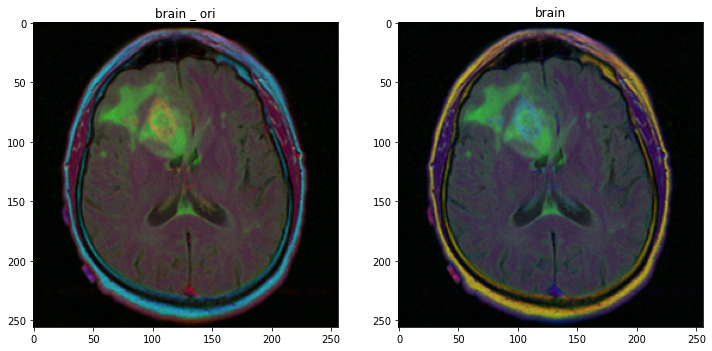

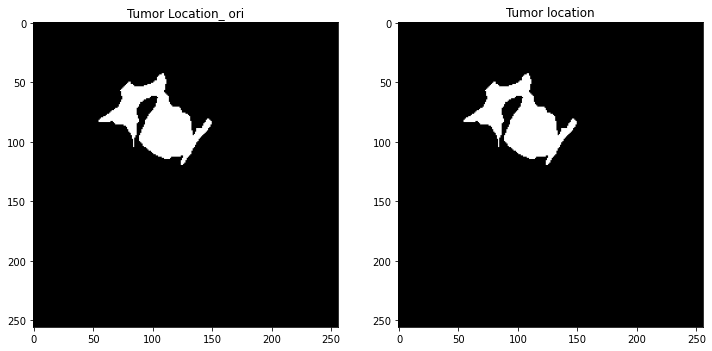

In [ ]:
path = '/content/ym/MyDrive/Colab Notebooks/CV/Image segmentation/Brain/TCGA_CS_4941_19960909_14.tif'
m_path = '/content/ym/MyDrive/Colab Notebooks/CV/Image segmentation/Brain/TCGA_CS_4941_19960909_14_mask.tif'


m = cv2.imread(m_path)
mm = cv2.cvtColor(m, cv2.COLOR_BGR2RGB)

i = cv2.imread(path)
ii = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)








plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(i)
plt.title('brain _ ori')

plt.subplot(1,2,2)
plt.imshow(ii)
plt.title('brain')

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Tumor Location_ ori')

plt.subplot(1,2,2)
plt.imshow(mm)
plt.title('Tumor location')




In [ ]:
print(i)


[[[1 2 0]
  [1 2 0]
  [1 4 0]
  ...
  [2 2 0]
  [2 2 0]
  [2 1 0]]

 [[1 4 0]
  [2 3 0]
  [2 4 0]
  ...
  [1 3 0]
  [1 2 0]
  [2 2 0]]

 [[2 4 0]
  [2 3 0]
  [4 4 0]
  ...
  [1 3 0]
  [2 2 0]
  [3 2 0]]

 ...

 [[2 3 0]
  [1 4 0]
  [1 3 0]
  ...
  [2 6 0]
  [2 6 0]
  [1 3 0]]

 [[2 3 0]
  [2 3 0]
  [0 2 0]
  ...
  [2 4 0]
  [2 6 0]
  [1 4 0]]

 [[2 4 0]
  [2 4 0]
  [0 2 0]
  ...
  [1 2 0]
  [1 2 0]
  [1 3 0]]]


In [ ]:
print(ii)

[[[0 2 1]
  [0 2 1]
  [0 4 1]
  ...
  [0 2 2]
  [0 2 2]
  [0 1 2]]

 [[0 4 1]
  [0 3 2]
  [0 4 2]
  ...
  [0 3 1]
  [0 2 1]
  [0 2 2]]

 [[0 4 2]
  [0 3 2]
  [0 4 4]
  ...
  [0 3 1]
  [0 2 2]
  [0 2 3]]

 ...

 [[0 3 2]
  [0 4 1]
  [0 3 1]
  ...
  [0 6 2]
  [0 6 2]
  [0 3 1]]

 [[0 3 2]
  [0 3 2]
  [0 2 0]
  ...
  [0 4 2]
  [0 6 2]
  [0 4 1]]

 [[0 4 2]
  [0 4 2]
  [0 2 0]
  ...
  [0 2 1]
  [0 2 1]
  [0 3 1]]]


**Load the paths of images and masks**

In [2]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

def load_images(path):
    images = []
    masks = []
    
    for filename in os.listdir(path):
        
       if '_mask' not in filename:

          print('No mask',filename)
          img = cv2.imread(os.path.join(path,filename))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
          #plt.imshow(cv2.imshow(img))
          images.append(img)

       else:

          print('mask',filename)
          img = cv2.imread(os.path.join(path,filename))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          #img = resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant', preserve_range=True)
          #plt.imshow(cv2.imshow(img))
          masks.append(img)
            
    return images, masks


**Run the load_images function**

In [3]:
path = r"/content/ym/MyDrive/Colab Notebooks/CV/Image segmentation/Brain"

img,mas = load_images(path)


#print(img, 'fgregrgrg', mas)

NameError: ignored

In [ ]:
print('Images', len(img))
print('Mask', len(mas))

Images 14
Mask 14


Images [[[0 3 1]
  [0 3 1]
  [0 4 0]
  ...
  [0 3 2]
  [0 3 2]
  [0 3 1]]

 [[0 4 0]
  [0 4 2]
  [0 4 1]
  ...
  [0 6 2]
  [0 6 1]
  [0 4 1]]

 [[0 3 2]
  [0 4 2]
  [0 4 2]
  ...
  [0 8 3]
  [0 9 2]
  [0 5 2]]

 ...

 [[0 6 2]
  [0 7 2]
  [0 3 1]
  ...
  [0 2 2]
  [0 2 3]
  [0 4 1]]

 [[0 7 1]
  [0 8 1]
  [0 4 1]
  ...
  [0 3 3]
  [0 2 4]
  [0 3 2]]

 [[0 5 1]
  [0 1 1]
  [0 4 1]
  ...
  [0 6 3]
  [0 2 1]
  [0 1 1]]]


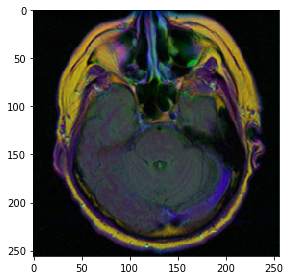

In [ ]:
print('Images', img[11])
imshow(img[11])

Mask [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


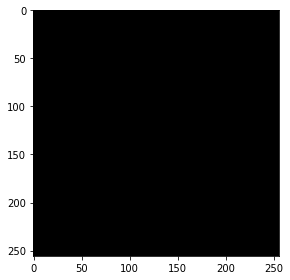

In [ ]:
print('Mask', mas[11])
imshow(mas[11])

**Covert to np array**

In [ ]:
images = np.array(img,dtype='uint8')
masks = np.array(mas,dtype='uint8')

print("Shape of Images ", images.shape)
print("Shape of Masks ", masks.shape)

Shape of Images  (14, 256, 256, 3)
Shape of Masks  (14, 256, 256, 3)


In [ ]:
print(images)

[[[[0 4 1]
   [0 2 2]
   [0 2 3]
   ...
   [0 4 2]
   [0 3 2]
   [0 2 2]]

  [[0 4 1]
   [0 2 2]
   [0 2 2]
   ...
   [0 5 2]
   [0 7 2]
   [0 6 2]]

  [[0 3 2]
   [0 4 3]
   [0 3 2]
   ...
   [0 4 1]
   [0 5 1]
   [0 4 2]]

  ...

  [[0 8 2]
   [0 4 1]
   [0 2 2]
   ...
   [0 7 1]
   [0 6 1]
   [0 2 1]]

  [[0 4 3]
   [0 0 3]
   [0 0 2]
   ...
   [0 7 2]
   [0 8 1]
   [0 2 1]]

  [[0 2 2]
   [0 0 3]
   [0 2 2]
   ...
   [0 8 2]
   [0 9 2]
   [0 2 2]]]


 [[[0 0 4]
   [0 0 4]
   [0 0 3]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 2]
   [0 0 1]
   [0 0 1]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 2]
   [0 0 3]
   [0 0 3]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 3 2]
   [0 4 2]
   [1 4 1]
   ...
   [1 6 1]
   [0 5 1]
   [0 2 1]]

  [[0 4 1]
   [0 4 2]
   [0 4 2]
   ...
   [1 5 2]
   [0 6 1]
   [0 4 1]]

  [[0 3 1]
   [0 2 1]
   [0 2 1]
   ...
   [0 2 1]
   [0 1 2]
   [0 2 3]]]


 [[[0 2 1]
   [0 3 0]
   [0 3 2]
   ...
   [0 2 2]
   [0 2 1]
   [0 2 1]]

  [[0 6

Images_11 [[[0 3 1]
  [0 3 1]
  [0 4 0]
  ...
  [0 3 2]
  [0 3 2]
  [0 3 1]]

 [[0 4 0]
  [0 4 2]
  [0 4 1]
  ...
  [0 6 2]
  [0 6 1]
  [0 4 1]]

 [[0 3 2]
  [0 4 2]
  [0 4 2]
  ...
  [0 8 3]
  [0 9 2]
  [0 5 2]]

 ...

 [[0 6 2]
  [0 7 2]
  [0 3 1]
  ...
  [0 2 2]
  [0 2 3]
  [0 4 1]]

 [[0 7 1]
  [0 8 1]
  [0 4 1]
  ...
  [0 3 3]
  [0 2 4]
  [0 3 2]]

 [[0 5 1]
  [0 1 1]
  [0 4 1]
  ...
  [0 6 3]
  [0 2 1]
  [0 1 1]]]


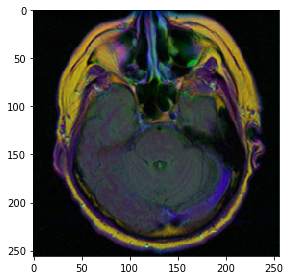

In [ ]:
imshow(images[11])
print('Images_11', images[11])

Masks_11 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


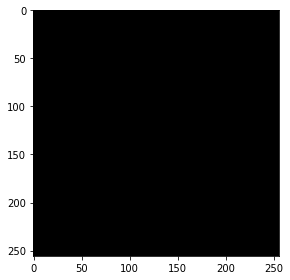

In [ ]:
print("Masks_11", masks[11])
imshow(masks[11])

**Display random iteration of images from the dataset with their masks**


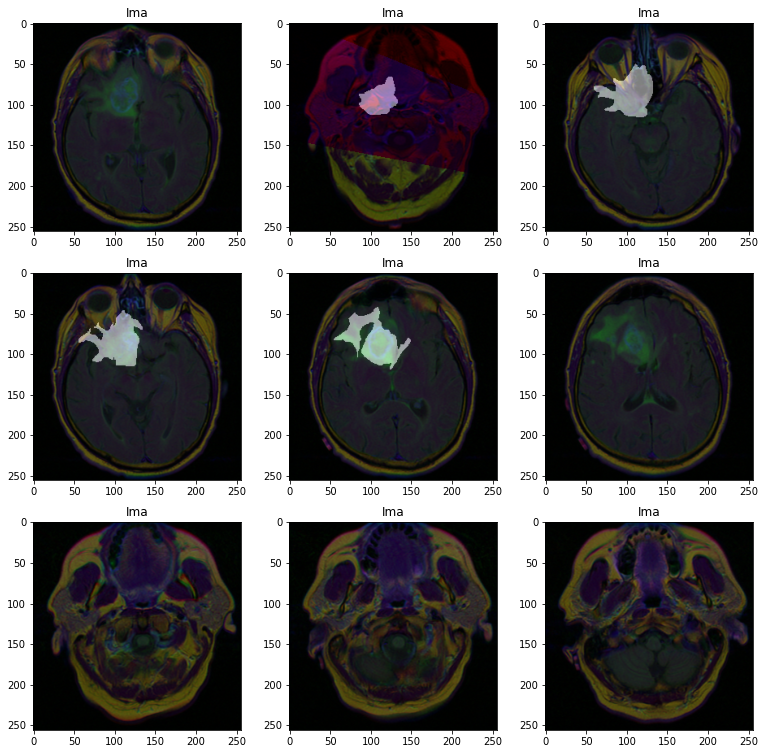

In [ ]:

fig = plt.figure(figsize=(13, 13))
rnd_no = np.random.randint(0,len(images)-9)
for ind, i in enumerate(range(rnd_no, rnd_no+9)):
    
    fig.add_subplot(3,3,ind+1)
    
    # get image & mask file paths
    img_path = images[i]
    msk_path = masks[i]
   
    # read images
    #img = imshow(img_path)
    #msk = imshow(msk_path)
    
    # display images
  
    plt.imshow(img_path)
    plt.imshow(msk_path, alpha=0.5)
    plt.title('Ima'.split('/')[-1].split('.')[0])

plt.show()

**Spliting**

In [ ]:
images_train, images_test, masks_train, masks_test = train_test_split(images, masks, test_size = .3,random_state = 42)

In [ ]:
print("Shape of Train Images ", images_train.shape)
print("Shape of Test Images ", images_test.shape)
print("Shape of Train Masks ", masks_train.shape)
print("Shape of Test Masks ", masks_test.shape)

Shape of Train Images  (9, 256, 256, 3)
Shape of Test Images  (5, 256, 256, 3)
Shape of Train Masks  (9, 256, 256, 3)
Shape of Test Masks  (5, 256, 256, 3)


**Changing the channel number**

In [ ]:
images_train = np.array(images_train).reshape(-1, IMG_HEIGHT,IMG_WIDTH,1)
print(images_train.shape)
images_test = np.array(images_test).reshape(-1, IMG_HEIGHT,IMG_WIDTH,1)
print(images_test.shape)
masks_train = np.array(masks_train).reshape(-1, IMG_HEIGHT,IMG_WIDTH,1)
print(masks_train.shape)
masks_test = np.array(masks_test).reshape(-1, IMG_HEIGHT,IMG_WIDTH,1)
print(masks_test.shape)

(108, 128, 128, 1)
(60, 128, 128, 1)
(108, 128, 128, 1)
(60, 128, 128, 1)


In [ ]:
#plt.imshow(images_train[1])
print(images_train[1])

[[[119]
  [ 64]
  [172]
  ...
  [ 65]
  [ 49]
  [ 91]]

 [[ 70]
  [ 45]
  [ 87]
  ...
  [ 84]
  [ 64]
  [ 63]]

 [[ 81]
  [ 68]
  [ 69]
  ...
  [ 11]
  [ 18]
  [  4]]

 ...

 [[ 48]
  [177]
  [155]
  ...
  [119]
  [176]
  [122]]

 [[ 88]
  [170]
  [ 96]
  ...
  [ 55]
  [ 31]
  [114]]

 [[ 52]
  [ 25]
  [113]
  ...
  [ 92]
  [ 81]
  [ 95]]]


**Build the U net model**

In [4]:

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, 1))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

NameError: ignored

In [ ]:
plot_model(model, 
           show_shapes = True, 
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 60)

In [ ]:
print('Output Shape ',outputs.shape)

Output Shape  (None, 128, 128, 1)


In [ ]:
print("Input Shape: ", inputs.shape)

Input Shape:  (None, 128, 128, 1)


**Way 1**

**Creating augmentation object**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen  = ImageDataGenerator(rescale = 1./255,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    rotation_range = 30,
                                    fill_mode = 'nearest',
                                    zoom_range = 0.2,
                                    shear_range = 0.2)

# Fitting to train data 
    #train_datagen.fit(images_train)


In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(train_datagen.flow(images_train, masks_train, batch_size = 5), validation_data =(images_test, masks_test), epochs = 5, verbose = 1)

Epoch 1/5
22/22 [==============================] - 21s 879ms/step - loss: -4.5849 - accuracy: 0.3142 - val_loss: 4508.8315 - val_accuracy: 0.1760
Epoch 2/5
22/22 [==============================] - 19s 851ms/step - loss: -130490218.0151 - accuracy: 0.2792 - val_loss: 59887370240.0000 - val_accuracy: 0.1923
Epoch 3/5
22/22 [==============================] - 19s 849ms/step - loss: -48679852822260.8672 - accuracy: 0.1186 - val_loss: 10078229880635392.0000 - val_accuracy: 0.2601
Epoch 4/5
22/22 [==============================] - 19s 846ms/step - loss: nan - accuracy: 0.3561 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/5
22/22 [==============================] - 19s 850ms/step - loss: nan - accuracy: 0.9803 - val_loss: nan - val_accuracy: 1.0000


In [ ]:
print(results.history.keys())
results.history['accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.2837456464767456,
 0.29069972038269043,
 0.16359399259090424,
 0.5978455543518066,
 0.9835307002067566]

**Way 2**

**Modelcheckpoint**

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, moo nitor='val_loss'),tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(images_train, masks_train, validation_split=0.2, batch_size=4, epochs=5)

Epoch 1/5
22/22 [==============================] - 15s 642ms/step - loss: nan - accuracy: 0.9852 - val_loss: nan - val_accuracy: 0.9770
Epoch 2/5
22/22 [==============================] - 14s 641ms/step - loss: nan - accuracy: 0.9852 - val_loss: nan - val_accuracy: 0.9770
Epoch 3/5
22/22 [==============================] - 14s 639ms/step - loss: nan - accuracy: 0.9852 - val_loss: nan - val_accuracy: 0.9770
Epoch 4/5
22/22 [==============================] - 14s 653ms/step - loss: nan - accuracy: 0.9852 - val_loss: nan - val_accuracy: 0.9770
Epoch 5/5
22/22 [==============================] - 14s 655ms/step - loss: nan - accuracy: 0.9852 - val_loss: nan - val_accuracy: 0.9770


In [ ]:
masks_pred=model.predict(images_test)

preds_0 = masks_pred[10] * 255.0
#preds_0 = preds_0.reshape(258, 540)
x_test_0 = images_test[10] * 255.0
#x_test_0 = x_test_0.reshape(258, 540)
plt.imshow(x_test_0, cmap='gray')

ValueError: ignored

In [ ]:


#predicting the test set result
masks_pred=model.predict(images_test)
masks_pred=(masks_pred >0.5)

print(type(masks_pred))

AttributeError: ignored

In [ ]:
masks_pred

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

In [ ]:
masks_pred[1]

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])

In [ ]:
# creating the confusion matrix

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

cm = confusion_matrix(masks_test,masks_pred) 
print ('Confusion Matrix :')
print(cm) 
print ('Accuracy Score :',accuracy_score(masks_test,masks_pred))
print ('Report : ')
print (classification_report(masks_test,masks_pred))

ValueError: ignored

In [ ]:
print(results.history.keys())
results.history['accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


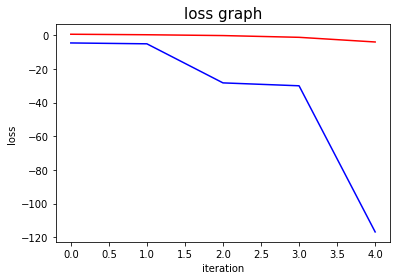

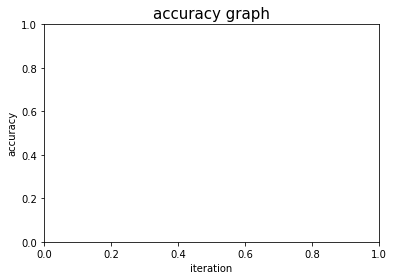

In [ ]:
from keras.callbacks import History 
history = History()
print(results.history.keys())

a = results.history

#list_traindice = a['dice_coef']
#list_testdice = a['val_dice_coef']

#list_trainjaccard = a['iou']
#list_testjaccard = a['val_iou']

list_trainloss = a['loss']
list_testloss = a['val_loss']
plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
#plt.plot(list_traindice, 'r-')
#plt.plot(list_testdice, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

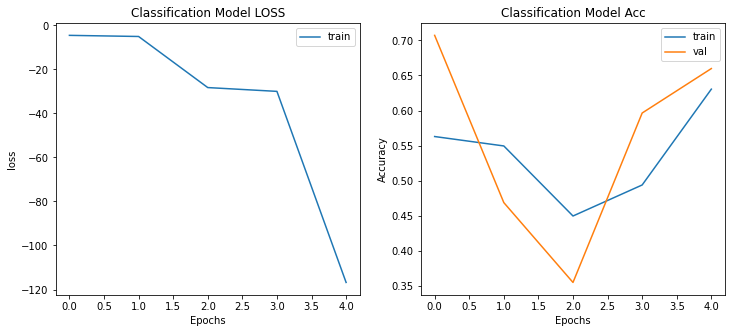

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(results.history['val_loss']);
plt.title("Classification Model LOSS");
plt.ylabel("loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(results.history['accuracy']);
plt.plot(results.history['val_accuracy']);
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [ ]:


idx = random.randint(0, len(images_train))


preds_train = model.predict(images_train[:int(images_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(masks_train[int(masks_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(images_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


NameError: ignored

In [ ]:
preds_train


In [ ]:
uniq_labels = ['yes', 'no']
directory="/content/ym/MyDrive/Colab Notebooks/CV/Image segmentation/brain_tumor_dataset/"
def load_images(directory,uniq_labels):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            #print(label)
            filepath = directory + "/" + label + "/" + file
            #print(filepath,  file)
            image =  tf.image.resize_images(image, 512, 512)
            #imshow(image)
            images.append(image)
            labels.append(idx)
            #print(labels)
    images = np.array(images)
    labels = np.array(labels)        
    return images,labels 

In [ ]:
#load images and labels
images,labels=load_images(directory,uniq_labels)


In [ ]:
print(images.shape , labels.shape)
imshow(images[211])
print(labels[211])

In [ ]:
#preprosessing (one hot encoding for labels & scaling for images)

labels =  keras.utils.to_categorical(labels)
images = images.astype("float32")/ 255.0

In [ ]:
#imshow(images[211])
print(labels[211])

In [ ]:
#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels)

In [ ]:
print(X_train.shape, labels.shape)




print(y_test.shape)

U net model

In [ ]:



seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = 'stage1_train/'
TEST_PATH = 'stage1_test/'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img

    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()




